In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [27]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [15]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [10]:
df[(df["age"] < 0) | (df["age"] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [16]:
df[(df["purchases"] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [19]:
df[(df["purchases"] > 0) & (df["revenue"] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [23]:
df[(df["purchases"] == 0) & (df["revenue"] > 0)]

,user_id,age,country,purchases,revenue


### 2.3.2
В столбце `age` обнаружено нереалистичное значение: возраст = 120. В столбце `purchases` найдено отрицательное значение (−1). Также найдено противоречие: пользователь совершил покупку (`purchases > 0`), но `revenue = 0`.

Также в столбце `age` присутствуют два пропуска, и в датасете обнаружен один дублирующийся ряд.

In [25]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [31]:
group = df.groupby("country")[["age", "purchases", "revenue"]].mean()
group

,age,purchases,revenue
country,,,
CN,24.000000,4.500000,1054.000000
DE,34.600000,6.500000,1445.500000
FR,46.250000,4.250000,675.916667
RU,30.076923,4.769231,790.076923
US,36.714286,4.625000,557.375000


In [48]:
bins = [0, 18, 40, 60, 80, 100, 120]
labels = ["0-18", "19-40", "41-60", "61-80", "81-100", "100+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
df["age_group"].value_counts()

age_group
19-40     24
41-60     12
0-18       2
100+       1
61-80      0
81-100     0
Name: count, dtype: int64

In [51]:
df.groupby("age_group", observed=False).agg({
    "revenue": "mean",
    "purchases": "mean"
})

,revenue,purchases
age_group,,
0-18,1296.000000,6.000000
19-40,863.791667,5.166667
41-60,632.333333,4.000000
61-80,NaN,NaN
81-100,NaN,NaN
100+,785.000000,-1.000000


### 2.3.3 
Распределение пользователей по возрастным группам показывает, что большинство относится к категории 19–40 лет (24 человека)
Возрастные группы 61–80 и 81–100 в датасете отсутствуют.

Анализ средних метрик показывает, что наибольшая средняя выручка наблюдается у группы 0–18 (1296), однако эта группа слишком мала для выводов. Основную стабильную активность демонстрируют пользователи 19–40 лет: у них средняя выручка составляет около 864 и  5,17 покупок.  Отрицательное значение количества покупок в группе 100+ связано с ранее выявленной ошибкой в данных.

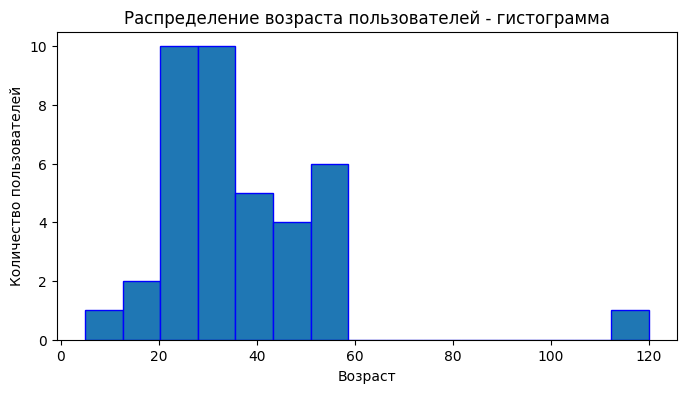

In [82]:
plt.figure(figsize=(8, 4))
plt.hist(df["age"].dropna(), bins=15, edgecolor="b")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Распределение возраста пользователей - гистограмма")
plt.savefig("figures/figure1.png", dpi=300)
plt.show()

Распределение возрастов пользователей показывает, что большинство находится в диапазоне 20–50 лет, встречается один выброс (120 лет).

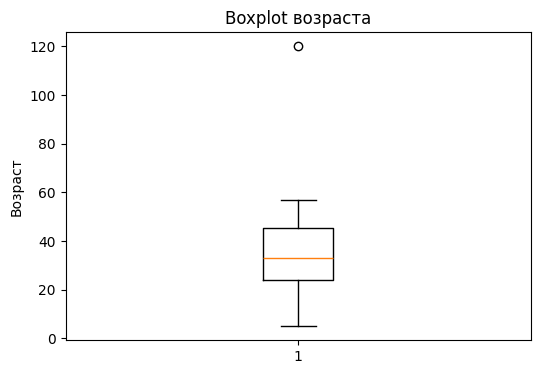

In [79]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["age"].dropna())
plt.ylabel("Возраст")
plt.title("Boxplot возраста")
plt.show()

Boxplot отражает медиану, разброс возрастов и выявляет выброс — 120 лет.

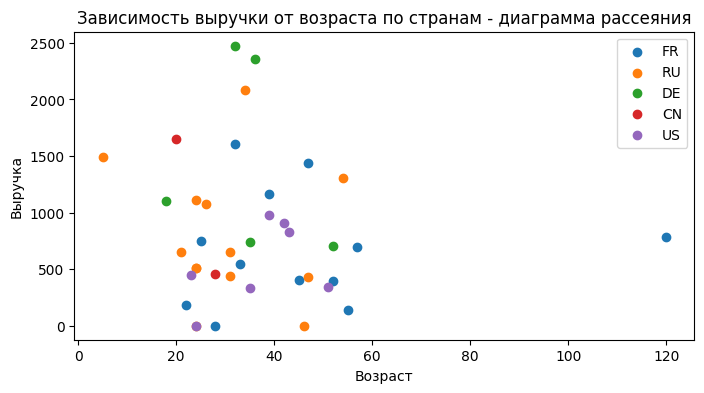

In [83]:
plt.figure(figsize=(8, 4))

for country in df["country"].unique():
    subset = df[df["country"] == country]
    plt.scatter(subset["age"], subset["revenue"], label=country)

plt.xlabel("Возраст")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от возраста по странам - диаграмма рассеяния")
plt.legend()
plt.show()

Диаграмма рассеяния показывает слабую связь между возрастом и выручкой, при этом страны формируют отдельные группы точек.